<a href="https://colab.research.google.com/github/atharvadesai1/Datasets-Regressions/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
female_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
num_female_smokers = len(female_smokers)

In [ ]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))
# df.isnull().sum()

[[ 1.10e+04  9.72e+03]
 [ 9.79e+03  8.55e+03]
 [ 3.80e+04  4.57e+04]
 [ 1.61e+04  1.30e+04]
 [ 6.93e+03  9.64e+03]
 [ 3.97e+03  4.50e+03]
 [ 1.55e+03  2.20e+03]
 [ 1.43e+04  1.14e+04]
 [ 8.95e+03  7.54e+03]
 [ 7.43e+03  5.43e+03]
 [ 4.54e+03  6.75e+03]
 [ 1.02e+04  1.05e+04]
 [ 8.66e+03  7.34e+03]
 [ 4.13e+03  4.19e+03]
 [ 2.78e+04  1.83e+04]
 [ 1.10e+04  1.07e+04]
 [ 1.13e+04  1.25e+04]
 [ 6.03e+03  3.49e+03]
 [ 8.17e+03  6.46e+03]
 [ 2.70e+04  3.35e+04]
 [ 3.36e+04  2.40e+04]
 [ 1.43e+04  1.26e+04]
 [ 1.17e+04  2.30e+04]
 [ 3.24e+04  2.31e+04]
 [ 4.41e+03  1.67e+03]
 [ 9.15e+03  4.67e+03]
 [ 1.13e+03  3.73e+03]
 [ 1.01e+04  7.68e+03]
 [ 4.09e+03  3.76e+03]
 [ 1.04e+04  8.41e+03]
 [ 8.96e+03  8.06e+03]
 [ 4.02e+04  4.90e+04]
 [ 1.55e+04  1.30e+04]
 [ 1.37e+04  2.06e+04]
 [ 2.47e+04  1.46e+04]
 [ 5.13e+03  4.14e+03]
 [ 1.28e+04  8.35e+03]
 [ 3.05e+04  5.12e+04]
 [ 3.34e+04  4.00e+04]
 [ 3.49e+03  1.88e+03]
 [ 4.00e+03  5.46e+03]
 [ 4.28e+03  2.87e+03]
 [ 3.05e+04  2.01e+04]
 [ 3.93e+04

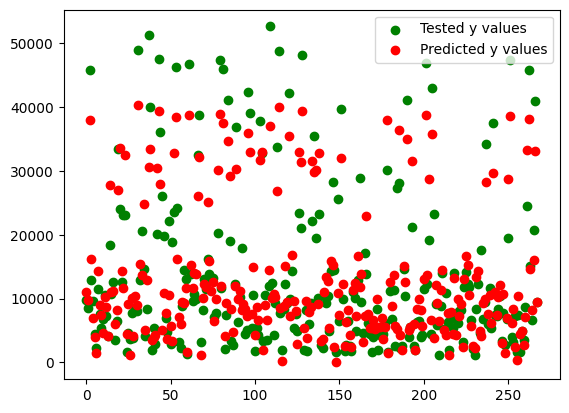

In [ ]:
plt.scatter(range(len(Y_test)), Y_test, label='Tested y values', color='green')
plt.scatter(range(len(Y_pred)), Y_pred, label='Predicted y values', color='red')
plt.legend()
plt.show()

TOTAL MALE COUNT : 676
TOTAL FEMALE COUNT : 662


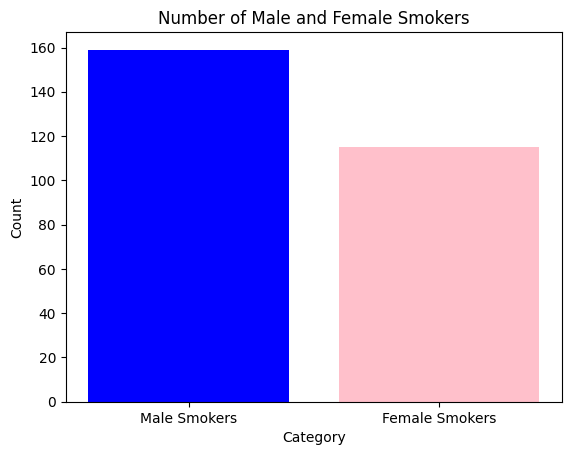

In [ ]:
male_smokers = df[(df['sex'] == 1) & (df['smoker'] == 1)]
female_smokers = df[(df['sex'] == 0) & (df['smoker'] == 1)]

num_male_smokers = len(male_smokers)
num_female_smokers = len(female_smokers)

categories = ['Male Smokers', 'Female Smokers']
counts = [num_male_smokers, num_female_smokers]

plt.bar(categories, counts, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Male and Female Smokers')

total_male = len(df[(df['sex']==1)])
total_female = len(df[(df['sex']==0)])

print(f'TOTAL MALE COUNT : {total_male}')
print(f'TOTAL FEMALE COUNT : {total_female}')
# Show the plot
plt.show()

In [ ]:
print(f'R2 Score = {metrics.r2_score(Y_test,Y_pred)}')
print(f'MAE = {metrics.mean_absolute_error(Y_test,Y_pred)}')
print(f'MSE = {metrics.mean_squared_error(Y_test,Y_pred)}')
print(f'RMSE ={np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))}')

R2 Score = 0.7998747145449959
MAE = 3930.333273901142
MSE = 31845929.13415944
RMSE =5643.219748880902
